### 1. 회귀 소개
- 유전적 특성을 연구하던 영국의 통계학자 갈톤(Galton)이 수행한 연구에서 유래했다는 것이 일반론임
    - 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙 존재
    - 이처럼 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법 통칭


- $Y = W_1*X_1 + W_2*X_2 + ... + W_n*X_n$
    - Y : 종속변수(결정 값) , Xn : 독립변수(피처), Wn : 회귀 계수(Regression coefficients)
    
    
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것 ! 

- 회귀 계수의 선형/비선형 여부, 독립변수 개수, 종속변수 개수에 따라 여러 가지 유형으로 나눌 수 있음
- 가장 중요한 것은 **회귀 계수** 
|독립변수 개수|회귀 계수의 결합|
|---|---:|
|1개 : 단일회귀|선형: 선형 회귀|
|여러 개 : 다중 회귀 | 비선형 : 비선형 회귀|

- 지도학습의 두가지 유형
    - 분류 : 예측값이 카테고리와 같은 이산형 클래스 값
    - 회귀 : 예측값이 연속형 숫자 값


- 선형 회귀를 가장 많이 사용함
- 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제 방법에 따라 유형을 나눌 수 있음 (규제 : 일반적 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것)


- `일반 선형 회귀` : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- `릿지(Ridge)` : 선형 회귀에 L2 규제를 추가한 회귀모델 , L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
- `라쏘(Rasso)` : 선형 회귀에 L1 규제를 적용한 회귀모델, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것, 피처 선택 기능으로도 불림
- `엘라스틱넷(ElasticNet)`: L2,L1 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에 적용되며 L1 규제로 피처 개수를 줄이면서 L2 규제로 계수 값의 크기 조정
- `로지스틱 회귀(Logistic Regression)`: 이름은 회귀지만 분류에 사용되는 선형 모델, 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

### 2. 단순 선형 회귀를 통한 회귀 이해
- 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델 : 전체 데이터의 잔차 합이 최소가 되는 모델 & 오류 값의 합이 최소가 될 수 있는 최적의 회귀 계수 찾음


- 오류 값은 음수일 수 있으므로 오류 합 계산 시 절대값을 취해 더하거나(MAE:Mean Absolute Error), 오류 값의 제곱을 구해 더함(RSS : Residual Sum of Squre)
- 일반적으로 RSS방식으로 오류합 구함 $Error^2 = RSS$
- RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항임 (회귀 계수가 중심 변수임!!)

$RSS(w_0,w_1) = 1/N \sum_{i=1}^{N} (y_i-(w_0+w_1*x_i))^2$)   (i : 1~학습 데이터 총 건수 N)
- RSS = 비용(Cost)함수 = 손실 함수(loss function)
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 비용 함수가 반환하는 값(=오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소 오류 값 구함

### 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- 비용 함수가 최소가 되는 W 파라미터 구하는 방법 중 하나
- 경사 하강법 : 점진적으로 반복적 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식
    - 데이터 기반으로 알고리즘이 스스로 학습한다는 머신러닝의 개념을 가능하게 만들어준 핵심 기법 중 하나
    - 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값 구할 수 있음
    - 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
    - 오류 값이 더 이상 작이지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환


어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까 ? 
- 비용 함수가 포물선 형태의 2차 함수라면 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w 반환
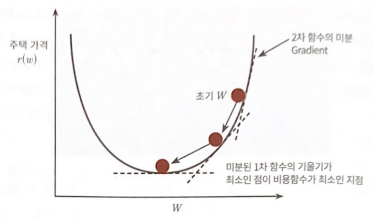

비용 함수를 R(w)로 지칭
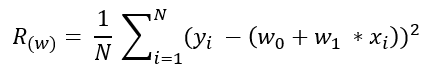
R(w)는 w0, w1으로 이루어진 함수이기 때문에 편미분을 적용
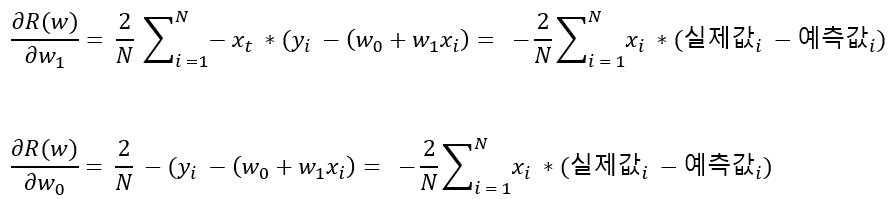
w1, w0 편미분 결괏값을 반복적으로 보정하면서 w1, w0 값을 업데이트하면 비용 함수 R(w)가 최소가 되는 w1, w0의 값을 구할 수 있음

업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스하면서 적용
편미분 값이 너무 클 수도 있기 때문에 보정 계수 η(eta)를 곱하는데 이를 학습률이라고 함
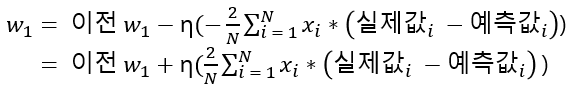


- Step 1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
- Step 2 : image , image로 업데이트 한 뒤 다시 비용 함수 값을 계산합니다.
- Step 3 : 비용 함수의 값이 감소했으면 Step 2를 반복합니다. 더 이상 감소하지 않는 경우, 그 때의 w1, w0를 구하고 반복을 중지합니다.

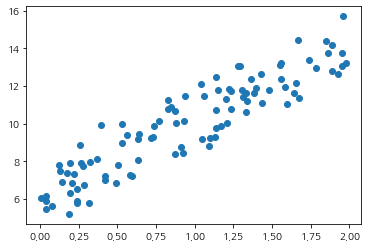

In [10]:
# 경사 하강법 구현
# y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 경사 하강법을 이용해 회귀 계수 w1, w0를 도출

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# 산점도로 시각화
plt.scatter(X,y)
# 데이터가 직선을 중심으로 무작위로 퍼져있음

비용함수 = $1/N\sum_{i=1}^{N}(실제값_i - 예측값_i)^2$

In [11]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [12]:
# w1과 w0를 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    # w1_update, w0_update를 각각 w1,w0와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값 차이 계산
    # 예측값 w0+X1*w1 + X2*w2 + ... = np.dot(X,w1.T) + w0
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1_update, w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [13]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [14]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))
# 실제 선형식과 유사하게 w1가 w2가 도출됨
# 예측 오류 비용은 약 0.9935

w1:4.022 w0:6.162
0.9934784315632568


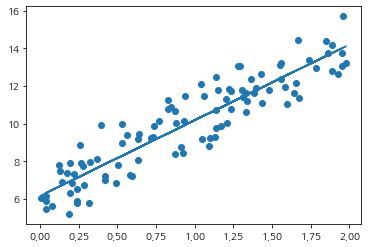

In [15]:
# y_pred 기반으로 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화 하기 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림
- 실전에서는 대부분 확률적 경사 하강법을 이용함


- 확률적 경사 하강법(Stochastic Gradient Descent)
    - 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도 보장
    - 대용량 데이터의 경우 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법 이용해 최적 비용함수 도출

In [16]:
# (미니 배치)확률적 경사 하강법 구현
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [17]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))\
# 경사 하강법으로 구한 값과 큰 차이가 없으며 예측 오류 비용또한 아주 조금 높으므로 
# 큰 예측 성능상 차이가 없음

w1: 4.028 w0: 6.156
0.9937111256675345


**피처가 여러 개인 경우로 확장**
- 피처가 M개인 경우 회귀 계수도 M+1개로 도출됨
- 예측 행렬 $\hat{Y} = np.dot(X_{mat}, W^T) + w_0$로 계산
